In [1]:
import os
from pathlib import Path

os.chdir(Path(os.getcwd()).resolve().parent.parent.as_posix())

from jabutiles.tile import Tile
from jabutiles.tilegen import TileGen
from jabutiles.tileops import TileOps

# Procedural Tile Generation Showdown

## Curbstone on Grass

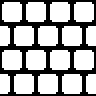

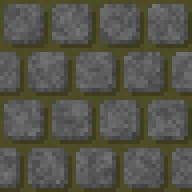

In [2]:
SCALE = 4
SIZE = 48
BRICK_SIZE = (SIZE//4, SIZE//4)
GAP_WIDTH = 2
EDGE_WIDTH = 1
SHADE_FORCE = 0.80

shape_mask = TileGen.gen_ort_mask(SIZE)
pattern_mask = TileGen.gen_brick_pattern_mask(shape_mask.size, BRICK_SIZE, GAP_WIDTH, EDGE_WIDTH).offset((-1, -1))
pattern_mask.display(SCALE//2)

texture_tile1 = TileGen.gen_texture_tile(shape_mask.size, 'grass.dry')
texture_tile2 = TileGen.gen_texture_tile(shape_mask.size, 'gravel')

shaded_base = TileOps.shade_tile(texture_tile1, pattern_mask, (1, 1), SHADE_FORCE, True)
shaded_head = TileOps.shade_tile(texture_tile2, pattern_mask, (-1, -1), SHADE_FORCE, False)

TileOps.overlay_tiles(shaded_base, shaded_head, pattern_mask).display(SCALE)

## Plank brigde over Water

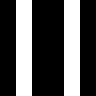

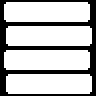

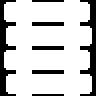

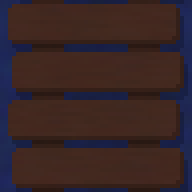

In [3]:
SCALE = 4
SIZE = (48, 48)
PLANK_SIZE = (SIZE[0]-2, SIZE[1]//4)
GAP_WIDTH = 3
EDGE_WIDTH = 1
SHADE_FORCE = 0.80

base_mask = TileGen.gen_ort_mask(SIZE)
head_mask1 = TileGen.gen_line_draw_mask(SIZE, [((SIZE[0]//4-0.5, 0), (SIZE[0]//4-0.5, SIZE[1]), 8)], invert=False)
head_mask1 = TileOps.merge_masks(head_mask1, head_mask1.mirror('|'))
head_mask2 = TileGen.gen_brick_pattern_mask(SIZE, PLANK_SIZE, GAP_WIDTH, EDGE_WIDTH, row_offset=1).offset((0, -1))
head_mask1_2 = TileOps.merge_masks(head_mask1, head_mask2)

head_mask1.display(SCALE//2)
head_mask2.display(SCALE//2)
head_mask1_2.display(SCALE//2)

texture_tile1 = TileGen.gen_texture_tile(SIZE, 'water').color(0.75)
texture_tile2 = TileGen.gen_texture_tile(SIZE, 'wood')

base_tile = TileOps.shade_tile(texture_tile1, head_mask1_2, (1, 2), SHADE_FORCE, True)
head_tile1 = TileOps.shade_tile(texture_tile2.brightness(SHADE_FORCE), head_mask2, (-1, -1), SHADE_FORCE)
head_tile2 = TileOps.shade_tile(texture_tile2.rotate(90), head_mask2, (-1, -1), SHADE_FORCE)

TileOps.merge_tiles((base_tile, base_mask), (head_tile1, head_mask1), (head_tile2, head_mask2)).display(SCALE)

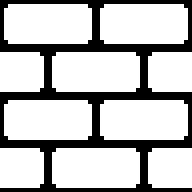

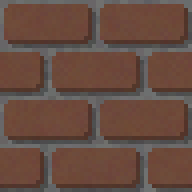

In [4]:
SCALE = 4
SIZE = 48
BRICK_SIZE = (SIZE//2, SIZE//4)
GAP_WIDTH = 2
EDGE_WIDTH = 1
SHADE_FORCE = 0.75

shape_mask = TileGen.gen_ort_mask(SIZE)
pattern_mask = TileGen.gen_brick_pattern_mask(shape_mask.size, BRICK_SIZE, GAP_WIDTH, EDGE_WIDTH).offset((-1, -1))
pattern_mask.display(SCALE)

texture_tile1 = TileGen.gen_texture_tile(shape_mask.size, 'stone').contrast(2)
texture_tile2 = TileGen.gen_texture_tile(shape_mask.size, 'clay').color(0.9)

shaded_base = TileOps.shade_tile(texture_tile1, pattern_mask, (1, 1), SHADE_FORCE, True)
shaded_head = TileOps.shade_tile(texture_tile2, pattern_mask, (-1, -1), SHADE_FORCE, False)

combined = TileOps.overlay_tiles(shaded_base, shaded_head, pattern_mask)
combined.display(SCALE)

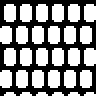

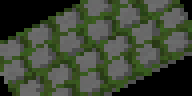

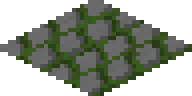

In [5]:
SCALE = 4
SIZE2 = 48
SIZE = (48, 24)
BRICK_SIZE = (8, 11)
GAP_WIDTH = 2
EDGE_WIDTH = 1
SHADE_FORCE = 0.75

iso_mask = TileGen.gen_iso_mask(SIZE)
shape_mask = TileGen.gen_ort_mask(SIZE2)
pattern_mask = TileGen.gen_brick_pattern_mask(shape_mask.size, BRICK_SIZE, GAP_WIDTH, EDGE_WIDTH, row_offset=6)#.offset((1, 1))
pattern_mask.display(SCALE//2)

texture_tile1 = TileGen.gen_texture_tile(shape_mask.size, 'grass')
texture_tile2 = TileGen.gen_texture_tile(shape_mask.size, 'stone')

shaded_base = TileOps.shade_tile(texture_tile1, pattern_mask, (1, -1), SHADE_FORCE, True)
shaded_head = TileOps.shade_tile(texture_tile2, pattern_mask, (-1, -1), SHADE_FORCE, False)

combined = (TileOps
    .overlay_tiles(shaded_base, shaded_head, pattern_mask)
    .scale((1, 0.5))
    .rotate(26.5, False)
)
combined.display(SCALE)

final = combined.cutout(iso_mask)
final.display(SCALE)

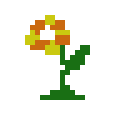

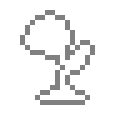

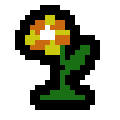

In [21]:
tile = Tile("jabutiles/tests/samples/addborder.png")
tile.display(5)

tile.outline(1, "gray", False).display(5)
tile.outline(2, "black", True).display(5)